# Exercício computacional I - Yurih Sales Coelho (2018093171)

Libraries used to solve the exercise


In [ ]:
#import
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.interpolate import interp1d

The exercise consists of analyzing different machine learning methods to estimate the mean squared error (MSEtest) in three different regression scenarios.
The 3 scenarios were defined as a function in python as shown below:

In [ ]:
def func1(x):
  return ((x-2)*(2*x+1)/(1+x**2)) #Para [-8 ≤ X ≤ 12]

def func2(x):
  return np.sin(x)  #Para [0 ≤ X ≤ 2π]

def func3(x):
  return (func2(2*x)/math.e**(x/5)) #Para [0 ≤ X ≤ 10]

An important point to highlight is that the data will be generated based on the behavior of the functions defined above, that is, it is important to create a function whose objective is to generate data (points) according to the functions above.
For this, a function was created with the name createData which has as parameters the lower (ll) and upper (ul) limits, the number of points to be created (num), the standard deviation (sd) and which function is for use as base (f)

In [ ]:
def createData(ll, ul, num, sd, f):
    X = np.random.uniform(ll, ul, num)

    if f == 1:
        Y = func1(X)
    elif f == 2:
        Y = func2(X)
    elif f == 3:
        Y = func3(X)

    e = np.random.normal(0, sd, num)
    X += e

    data = {'X': X, 'Y': Y}
    df = pd.DataFrame(data).sort_values(by='X')
    var_e = np.var(e)

    return df, var_e


The metrics that will be used during this exercise were presented in the file made available by the subject teacher on Moodle. Based on the definition of this file, the functions below were created that represent the metrics.


In [ ]:
def findMSE(y, yhat):
  return np.mean((y-yhat)**2)

def findBIAS(y, yhat):
  return (np.mean(yhat)-np.mean(y))

def findVariance(y):
  return (np.mean((y-np.mean(y))**2))

##Função 1 - (X−2)(2X+1)/(1+X^2)

In [ ]:
f = 1
ll = -8
ul = 12
num = 40
sd = 0.05

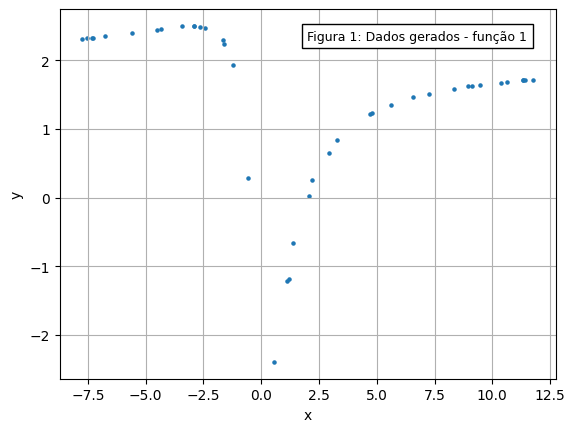

In [ ]:
df, var_e = createData(ll, ul, num, sd, f)

fig, ax = plt.subplots()
ax.scatter(df['X'], df['Y'], s=5)
ax.set(xlabel='x', ylabel='y')
ax.grid()
plt.text(2, 2.3, "Figura 1: Dados gerados - função 1", fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))

plt.show()


Once the data is being generated as expected, you can test the following methods:

* Sample average of observed values
* Linear regression of Y on X
* Quadratic regression of Y on X
* Cubic regression of Y on X
* Data interpolation

In [ ]:
mse1 = []
bias1 = []
var1 = []
e1 = []

####Method 1 - Sample average of observed values


In [ ]:
mseArr = []
biasArr = []
varArr = []
eArr = []
step = 0.1

for i in range (20):
  df, var_epsilon = createData(ll, ul, num, sd, f)

  X = np.array(df['X'])
  Y = np.array(df['Y'])

  fhat = df['Y'].mean()

  seqx = np.arange(ll, ul + step, step)
  seqy = [func1(x) for x in seqx]

  # yhat = np.full(num + 1, fhat)
  yhat = np.full(len(seqy), fhat)

  varAux = findMSE(seqy, yhat)
  mseArr.append(varAux)

  varAux = findBIAS(seqy, yhat)
  biasArr.append(varAux)

  varAux = findVariance(yhat)
  varArr.append(varAux)

  eArr.append(var_e)


bias1.append(np.mean(biasArr))
mse1.append(np.mean(mseArr))
var1.append(np.mean(varArr))
e1.append(np.mean(eArr))

Once you have carried out method 1 (Sample average of observed values), you can view your answer below:

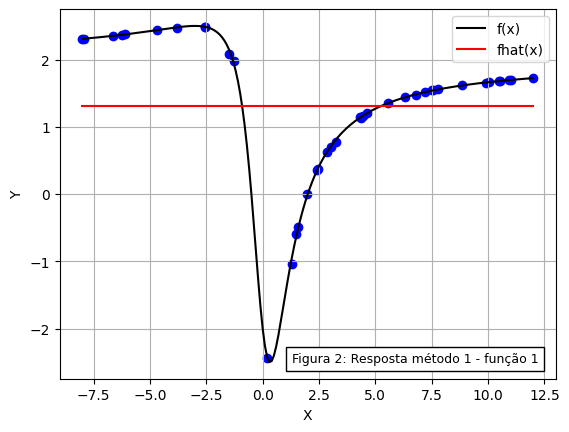

In [ ]:
plt.figure()
plt.scatter(X, Y, color = 'blue')
plt.plot(seqx, seqy, label='f(x)', color='black')
plt.plot(seqx, yhat, label='fhat(x)', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(1.3, -2.5, "Figura 2: Resposta método 1 - função 1", fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))
plt.legend()
plt.grid()

plt.show()

It is notable that method 1 was not able to solve the problem, which was expected, as the problem was too complex to solve in this way.


####Method 2 - Linear regression of Y on X


In [ ]:
mseArr = []
biasArr = []
varArr = []
eArr = []
step = 0.1

for i in range (20):
  df, var_e = createData(ll, ul, num, sd, f)

  X = np.array(df['X']).reshape(-1,1)
  Y = np.array(df['Y'])

  model = LinearRegression()
  model.fit(X,Y)

  seqx = np.arange(ll, ul + step, step).reshape(-1,1)
  seqy = [func1(x[0]) for x in seqx]

  yhat = model.predict(seqx)

  varAux = findMSE(seqy, yhat)
  mseArr.append(varAux)

  varAux = findBIAS(seqy, yhat)
  biasArr.append(varAux)

  varAux = findVariance(yhat)
  varArr.append(varAux)

  eArr.append(var_e)


bias1.append(np.mean(biasArr))
mse1.append(np.mean(mseArr))
var1.append(np.mean(varArr))
e1.append(np.mean(eArr))

Once you have carried out method 2 (Linear regression of Y on X), you can view your answer below:


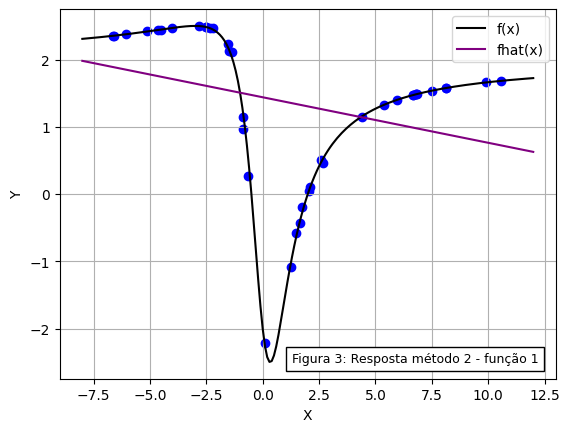

In [ ]:
plt.figure()
plt.scatter(X, Y, color = 'blue')
plt.plot(seqx, seqy, label='f(x)', color='black')
plt.plot(seqx, yhat, label='fhat(x)', color='purple')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(1.3, -2.5, "Figura 3: Resposta método 2 - função 1", fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))
plt.legend()
plt.grid()

plt.show()

As with method 1, it is notable that method 1 was unable to resolve the issue at hand.


####Method 3 - Regression of Y on X (4th order)


In [ ]:
mseArr = []
biasArr = []
varArr = []
eArr = []
step = 0.1

poly = PolynomialFeatures(degree=4)
model = LinearRegression()

for i in range (20):
  df, var_e = createData(ll, ul, num, sd, f)

  X = np.array(df['X']).reshape(-1,1)
  Y = np.array(df['Y'])

  Xpoly = poly.fit_transform(X)

  model.fit(Xpoly, Y)

  seqx = np.arange(ll, ul + step, step)
  seqy = [func1(x) for x in seqx]

  seqx = np.array(seqx).reshape(-1, 1)
  seqxPoly = poly.transform(seqx)
  yhat = model.predict(seqxPoly)

  varAux = findMSE(seqy, yhat)
  mseArr.append(varAux)

  varAux = findBIAS(seqy, yhat)
  biasArr.append(varAux)

  varAux = findVariance(yhat)
  varArr.append(varAux)

  eArr.append(var_e)


bias1.append(np.mean(biasArr))
mse1.append(np.mean(mseArr))
var1.append(np.mean(varArr))
e1.append(np.mean(eArr))

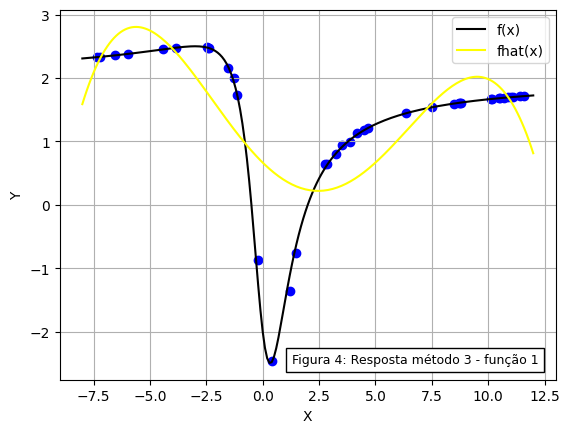

In [ ]:
plt.figure()
plt.scatter(X, Y, color='blue')
plt.plot(seqx, seqy, label='f(x)', color='black')
plt.plot(seqx, yhat, label='fhat(x)', color='yellow')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(1.3, -2.5, "Figura 4: Resposta método 3 - função 1", fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))
plt.legend()
plt.grid()
plt.show()


Unlike the previous methods, in this one it is already possible to observe that it tries to adjust a little more to the expected graph, but the complexity is still too high for it to be able to adjust


####Method 4 - Regression of Y on X (8th order)


In [ ]:
mseArr = []
biasArr = []
varArr = []
eArr = []
step = 0.1

poly = PolynomialFeatures(degree=8)
model = LinearRegression()

for i in range (20):
  df, var_e = createData(ll, ul, num, sd, f)

  X = np.array(df['X']).reshape(-1,1)
  Y = np.array(df['Y'])

  Xpoly = poly.fit_transform(X)

  model.fit(Xpoly, Y)

  seqx = np.arange(ll, ul + step, step)
  seqy = [func1(x) for x in seqx]

  seqx = np.array(seqx).reshape(-1, 1)
  seqxPoly = poly.transform(seqx)
  yhat = model.predict(seqxPoly)

  varAux = findMSE(seqy, yhat)
  mseArr.append(varAux)

  varAux = findBIAS(seqy, yhat)
  biasArr.append(varAux)

  varAux = findVariance(yhat)
  varArr.append(varAux)

  eArr.append(var_e)


bias1.append(np.mean(biasArr))
mse1.append(np.mean(mseArr))
var1.append(np.mean(varArr))
e1.append(np.mean(eArr))

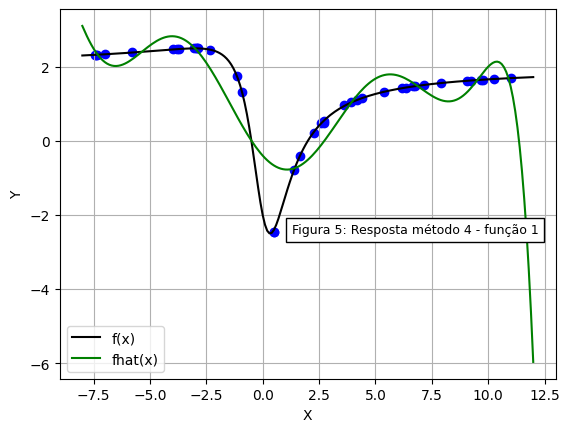

In [ ]:
plt.figure()
plt.scatter(X, Y, color='blue')
plt.plot(seqx, seqy, label='f(x)', color='black')
plt.plot(seqx, yhat, label='fhat(x)', color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(1.3, -2.5, "Figura 5: Resposta método 4 - função 1", fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))
plt.legend()
plt.grid()
plt.show()


Para o polinômio de oitavo grau, percebe-se que seu ajuste ja é bem melhor que os outros, apesar de no intervalo (-2.5,-5) não se aproxima tanto da função

####Method 5 - Data interpolation


In [ ]:
mseArr = []
biasArr = []
varArr = []
eArr = []
step = 0.1

for i in range (20):
  df, var_e = createData(ll, ul, num, sd, f)

  X = np.array(df['X'])
  Y = np.array(df['Y'])

  fhat = interp1d(X, Y, kind = 'linear')

  seqx = np.arange(X.min(), X.max(), step)
  seqy = [func1(x) for x in seqx]

  yhat = fhat(seqx)

  varAux = findMSE(seqy, yhat)
  mseArr.append(varAux)

  varAux = findBIAS(seqy, yhat)
  biasArr.append(varAux)

  varAux = findVariance(yhat)
  varArr.append(varAux)

  eArr.append(var_e)


bias1.append(np.mean(biasArr))
mse1.append(np.mean(mseArr))
var1.append(np.mean(varArr))
e1.append(np.mean(eArr))

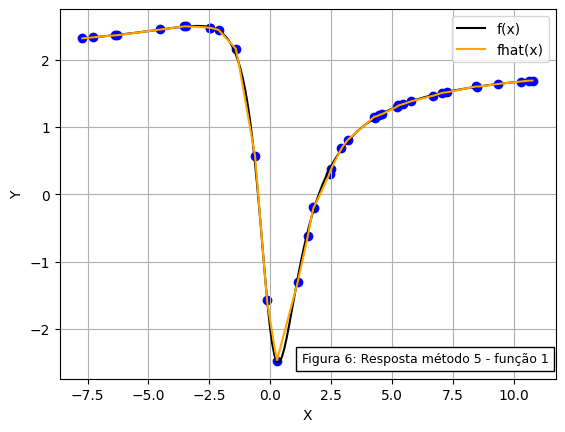

In [ ]:
plt.figure()
plt.scatter(X, Y, color='blue')
plt.plot(seqx, seqy, label='f(x)', color='black')
plt.plot(seqx, yhat, label='fhat(x)', color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(1.3, -2.5, "Figura 6: Resposta método 5 - função 1", fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))
plt.legend()
plt.grid()
plt.show()


Finally, for the data interpolation method, it managed to represent the function almost perfectly, its limitation is only in the amount of data sampled and, probably if there were more data between the range -2.5 and 1 in close to the original function


####Final analysis - Function 1


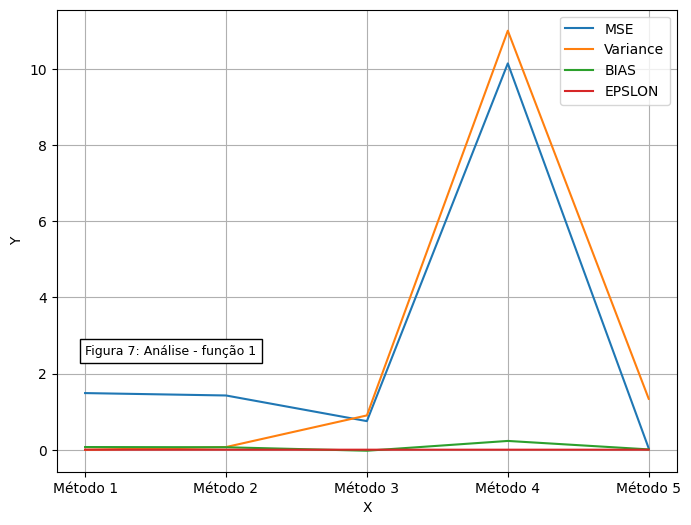

In [ ]:
xLabel = ['Método 1', 'Método 2', 'Método 3', 'Método 4', 'Método 5']

plt.figure(figsize=(8, 6))
plt.plot(xLabel, mse1, label='MSE')
plt.plot(xLabel, var1, label='Variance')
plt.plot(xLabel, bias1, label='BIAS')
plt.plot(xLabel, e1, label='EPSLON')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(0, 2.5, "Figura 7: Análise - função 1", fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))
plt.legend()
plt.grid()

plt.show()

According to the figure above, it is possible to analyze the MSE, Variance, BIAS and Epslon Variance of each of the methods. For MSE specifically, it is notable how it starts relatively high and has a slight decay until method 3, however in method 4 it rises considerably, this is due to the reason that the complexity of the function was very high and was unable to adjust well to the model, causing overfitting. For the first two methods, the opposite happened, as they were not very complex methods, it generated underfitting, that is, they were unable to solve the problem. Of the first 4 methods, method 3 was the one that came closest to solving the problem, but method 5 was practically perfect in this regard, thus being the best of the solutions analyzed.


##Function 2 - sin(x)


In [ ]:
f = 2
ll = 0
ul = 2*np.pi
num = 40
sd = 0.05
step = 0.1

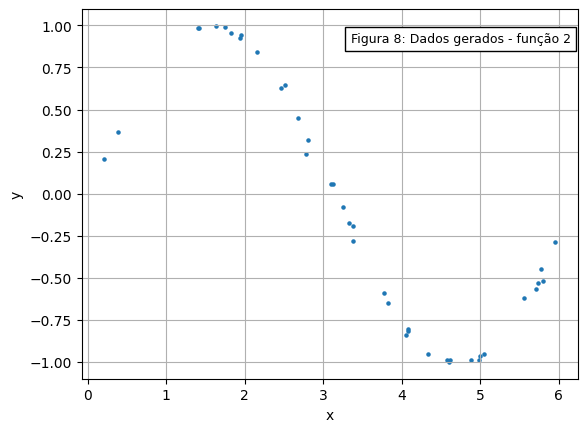

In [ ]:
df, var_e = createData(ll, ul, num, sd, f)

fig, ax = plt.subplots()
ax.scatter(df['X'], df['Y'], s=5)
ax.set(xlabel='x', ylabel='y')
ax.grid()
plt.text(3.35, 0.9, "Figura 8: Dados gerados - função 2", fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))

plt.show()


Once the data is being generated as expected, you can test the following methods:

* Sample average of observed values
* Linear regression of Y on X
* Quadratic regression of Y on X
* Cubic regression of Y on X
* Data interpolation

In [ ]:
mse2 = []
bias2 = []
var2 = []
e2 = []

####Method 1 - Sample average of observed values


In [ ]:
mseArr = []
biasArr = []
varArr = []
eArr = []

for i in range (20):
  df, var_epsilon = createData(ll, ul, num, sd, f)

  X = np.array(df['X'])
  Y = np.array(df['Y'])

  fhat = df['Y'].mean()

  seqx = np.arange(ll, ul + step, step)
  seqy = [func2(x) for x in seqx]


  yhat = np.full(len(seqx), fhat)

  varAux = findMSE(seqy, yhat)
  mseArr.append(varAux)

  varAux = findBIAS(seqy, yhat)
  biasArr.append(varAux)

  varAux = findVariance(yhat)
  varArr.append(varAux)

  eArr.append(var_e)


bias2.append(np.mean(biasArr))
mse2.append(np.mean(mseArr))
var2.append(np.mean(varArr))
e2.append(np.mean(eArr))

Once you have carried out method 1 (Sample average of observed values), you can view your answer below:


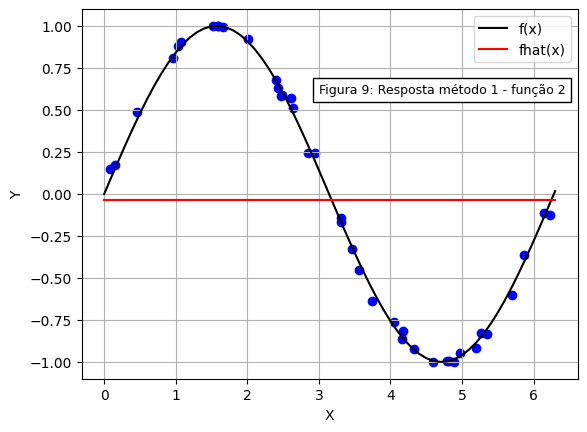

In [ ]:
plt.figure()
plt.scatter(X, Y, color = 'blue')
plt.plot(seqx, seqy, label='f(x)', color='black')
plt.plot(seqx, yhat, label='fhat(x)', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(3, 0.6, "Figura 9: Resposta método 1 - função 2", fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))
plt.legend()
plt.grid()

plt.show()

It is notable that method 1 was not able to solve the problem, which was expected, as the problem was too complex to solve in this way.


####Method 2 - Linear regression of Y on X


In [ ]:
mseArr = []
biasArr = []
varArr = []
eArr = []

for i in range (20):
  df, var_e = createData(ll, ul, num, sd, f)

  X = np.array(df['X']).reshape(-1,1)
  Y = np.array(df['Y'])

  model = LinearRegression()
  model.fit(X,Y)

  seqx = np.arange(ll, ul + step, step).reshape(-1,1)
  seqy = [func2(x[0]) for x in seqx]

  yhat = model.predict(seqx)

  varAux = findMSE(seqy, yhat)
  mseArr.append(varAux)

  varAux = findBIAS(seqy, yhat)
  biasArr.append(varAux)

  varAux = findVariance(yhat)
  varArr.append(varAux)

  eArr.append(var_e)


bias2.append(np.mean(biasArr))
mse2.append(np.mean(mseArr))
var2.append(np.mean(varArr))
e2.append(np.mean(eArr))

Once you have carried out method 2 (Linear regression of Y on X), you can view your answer below:


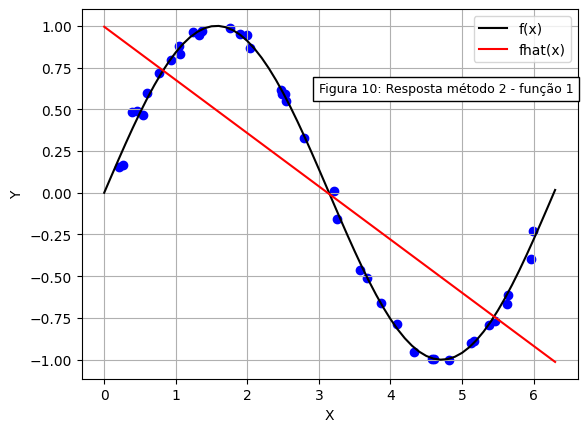

In [ ]:
plt.figure()
plt.scatter(X, Y, color = 'blue')
plt.plot(seqx, seqy, label='f(x)', color='black')
plt.plot(seqx, yhat, label='fhat(x)', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(3, 0.6, "Figura 10: Resposta método 2 - função 1", fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))
plt.legend()
plt.grid()

plt.show()

As with method 1, it is notable that method 1 was unable to resolve the issue at hand.


####Method 3 - Regression of Y on X (4th order)


In [ ]:
mseArr = []
biasArr = []
varArr = []
eArr = []

poly = PolynomialFeatures(degree=4)
model = LinearRegression()

for i in range (20):
  df, var_e = createData(ll, ul, num, sd, f)

  X = np.array(df['X']).reshape(-1,1)
  Y = np.array(df['Y'])

  Xpoly = poly.fit_transform(X)

  model.fit(Xpoly, Y)

  seqx = np.arange(ll, ul + step, step)
  seqy = [func2(x) for x in seqx]

  seqx = np.array(seqx).reshape(-1, 1)
  seqxPoly = poly.transform(seqx)
  yhat = model.predict(seqxPoly)

  varAux = findMSE(seqy, yhat)
  mseArr.append(varAux)

  varAux = findBIAS(seqy, yhat)
  biasArr.append(varAux)

  varAux = findVariance(yhat)
  varArr.append(varAux)

  eArr.append(var_e)

bias2.append(np.mean(biasArr))
mse2.append(np.mean(mseArr))
var2.append(np.mean(varArr))
e2.append(np.mean(eArr))

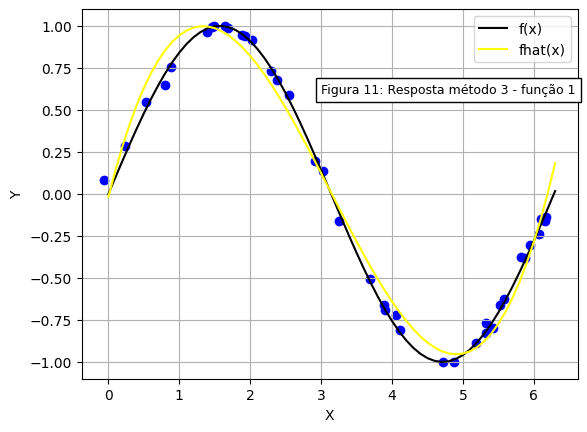

In [ ]:
plt.figure()
plt.scatter(X, Y, color='blue')
plt.plot(seqx, seqy, label='f(x)', color='black')
plt.plot(seqx, yhat, label='fhat(x)', color='yellow')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(3, 0.6, "Figura 11: Resposta método 3 - função 1", fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))
plt.legend()
plt.grid()
plt.show()


Unlike previous methods, this one can already get very close to the signal


####Method 4 - Regression of Y on X (8th order)


In [ ]:
mseArr = []
biasArr = []
varArr = []
eArr = []

poly = PolynomialFeatures(degree=8)
model = LinearRegression()

for i in range (20):
  df, var_e = createData(ll, ul, num, sd, f)

  X = np.array(df['X']).reshape(-1,1)
  Y = np.array(df['Y'])

  Xpoly = poly.fit_transform(X)

  model.fit(Xpoly, Y)

  seqx = np.arange(ll, ul + step, step)
  seqy = [func2(x) for x in seqx]

  seqx = np.array(seqx).reshape(-1, 1)
  seqxPoly = poly.transform(seqx)
  yhat = model.predict(seqxPoly)

  varAux = findMSE(seqy, yhat)
  mseArr.append(varAux)

  varAux = findBIAS(seqy, yhat)
  biasArr.append(varAux)

  varAux = findVariance(yhat)
  varArr.append(varAux)

  eArr.append(var_e)

bias2.append(np.mean(biasArr))
mse2.append(np.mean(mseArr))
var2.append(np.mean(varArr))
e2.append(np.mean(eArr))

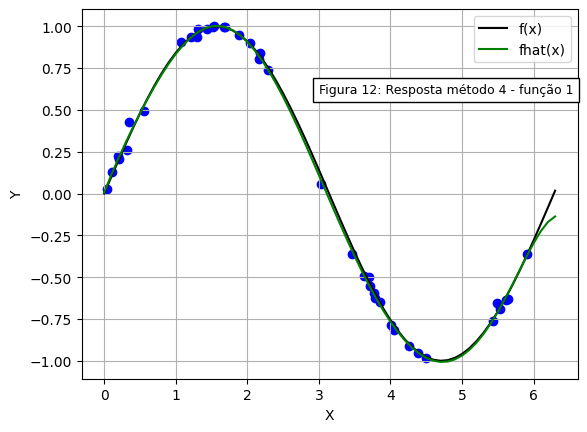

In [ ]:
plt.figure()
plt.scatter(X, Y, color='blue')
plt.plot(seqx, seqy, label='f(x)', color='black')
plt.plot(seqx, yhat, label='fhat(x)', color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(3, 0.6, "Figura 12: Resposta método 4 - função 1", fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))
plt.legend()
plt.grid()
plt.show()


For the eighth degree polynomial, it is clear that its adjustment is much better than the others, although in the end it has a slight distortion, even so the result is very satisfactory


####Method 5 - Data interpolation


In [ ]:
mseArr = []
biasArr = []
varArr = []
eArr = []

for i in range (20):
  df, var_e = createData(ll, ul, num, sd, f)

  X = np.array(df['X'])
  Y = np.array(df['Y'])

  fhat = interp1d(X, Y, kind = 'linear')

  seqx = np.arange(X.min(), X.max(), step)
  seqy = [func2(x) for x in seqx]

  yhat = fhat(seqx)

  varAux = findMSE(seqy, yhat)
  mseArr.append(varAux)

  varAux = findBIAS(seqy, yhat)
  biasArr.append(varAux)

  varAux = findVariance(yhat)
  varArr.append(varAux)

  eArr.append(var_e)


bias2.append(np.mean(biasArr))
mse2.append(np.mean(mseArr))
var2.append(np.mean(varArr))
e2.append(np.mean(eArr))

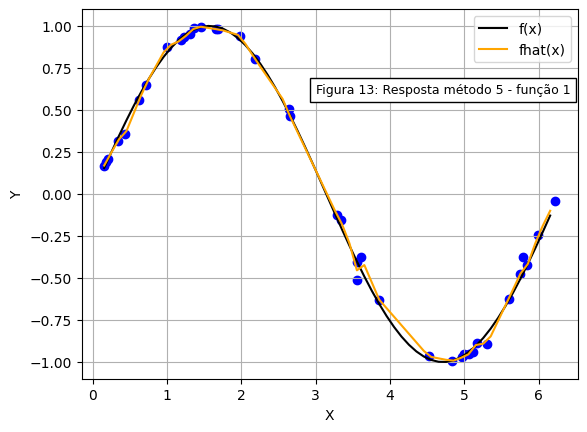

In [ ]:
plt.figure()
plt.scatter(X, Y, color='blue')
plt.plot(seqx, seqy, label='f(x)', color='black')
plt.plot(seqx, yhat, label='fhat(x)', color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(3, 0.6, "Figura 13: Resposta método 5 - função 1", fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))
plt.legend()
plt.grid()
plt.show()


Finally, for the data interpolation method, it managed to represent the function well, its limitation is only in the amount of data sampled, however for this case, method 4 proved to be the most efficient in the solution.


####Final analysis - Function 2


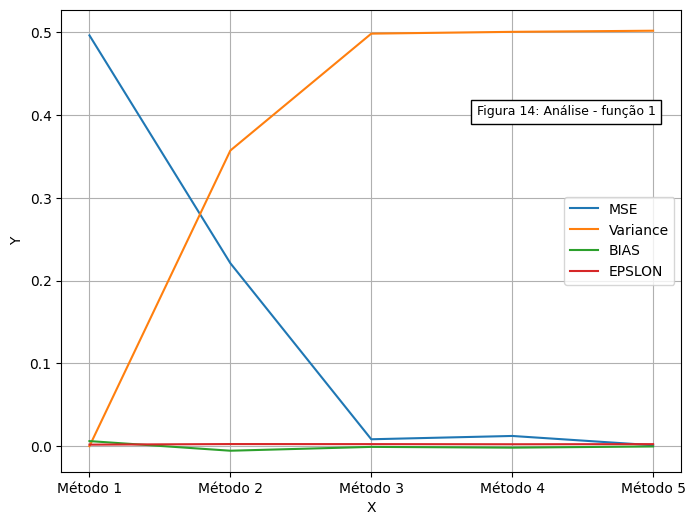

In [ ]:
xLabel = ['Método 1', 'Método 2', 'Método 3', 'Método 4', 'Método 5']

plt.figure(figsize=(8, 6))
plt.plot(xLabel, mse2, label='MSE')
plt.plot(xLabel, var2, label='Variance')
plt.plot(xLabel, bias2, label='BIAS')
plt.plot(xLabel, e2, label='EPSLON')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(2.75, 0.4, "Figura 14: Análise - função 1", fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))
plt.legend()
plt.grid()

plt.show()

For function 2, the MSE decreases considerably depending on the methods, a slight protrusion is notable in method 4, this is probably due to the end of its approximation, where the solution proposed by method 4 is distorted a little, disregarding this it would probably be the method with the best metrics.


##Function 3 - sin(2x)/e^(x/5)


In [ ]:
f = 3
ll = 0
ul = 10
num = 40
sd = 0.05
step = 0.1

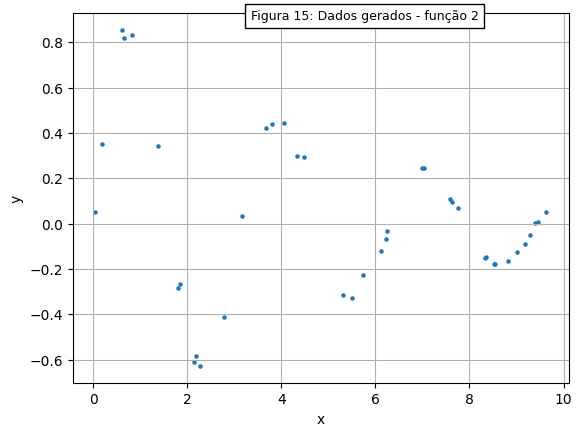

In [ ]:
df, var_e = createData(ll, ul, num, sd, f)

fig, ax = plt.subplots()
ax.scatter(df['X'], df['Y'], s=5)
ax.set(xlabel='x', ylabel='y')
ax.grid()
plt.text(3.35, 0.9, "Figura 15: Dados gerados - função 2", fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))

plt.show()

Once the data is being generated as expected, you can test the following methods:

* Sample average of observed values
* Linear regression of Y on X
* Quadratic regression of Y on X
* Cubic regression of Y on X
* Data interpolation

In [ ]:
mse3 = []
bias3 = []
var3 = []
e3 = []

####Method 1 - Sample average of observed values


In [ ]:
mseArr = []
biasArr = []
varArr = []
eArr = []

for i in range (20):
  df, var_epsilon = createData(ll, ul, num, sd, f)

  X = np.array(df['X'])
  Y = np.array(df['Y'])

  fhat = df['Y'].mean()

  seqx = np.arange(ll, ul + step, step)
  seqy = [func3(x) for x in seqx]


  yhat = np.full(len(seqx), fhat)

  varAux = findMSE(seqy, yhat)
  mseArr.append(varAux)

  varAux = findBIAS(seqy, yhat)
  biasArr.append(varAux)

  varAux = findVariance(yhat)
  varArr.append(varAux)

  eArr.append(var_e)


bias3.append(np.mean(biasArr))
mse3.append(np.mean(mseArr))
var3.append(np.mean(varArr))
e3.append(np.mean(eArr))

Once you have carried out method 1 (Sample average of observed values), you can view your answer below:


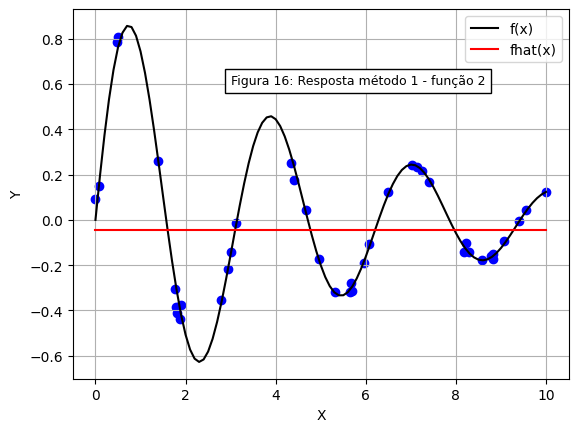

In [ ]:
plt.figure()
plt.scatter(X, Y, color = 'blue')
plt.plot(seqx, seqy, label='f(x)', color='black')
plt.plot(seqx, yhat, label='fhat(x)', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(3, 0.6, "Figura 16: Resposta método 1 - função 2", fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))
plt.legend()
plt.grid()

plt.show()

It is notable that method 1 was not able to solve the problem, which was expected, as the problem was too complex to solve in this way.


####Method 2 - Linear regression of Y on X


In [ ]:
mseArr = []
biasArr = []
varArr = []
eArr = []

for i in range (20):
  df, var_e = createData(ll, ul, num, sd, f)

  X = np.array(df['X']).reshape(-1,1)
  Y = np.array(df['Y'])

  model = LinearRegression()
  model.fit(X,Y)

  seqx = np.arange(ll, ul + step, step).reshape(-1,1)
  seqy = [func3(x[0]) for x in seqx]

  yhat = model.predict(seqx)

  varAux = findMSE(seqy, yhat)
  mseArr.append(varAux)

  varAux = findBIAS(seqy, yhat)
  biasArr.append(varAux)

  varAux = findVariance(yhat)
  varArr.append(varAux)

  eArr.append(var_e)


bias3.append(np.mean(biasArr))
mse3.append(np.mean(mseArr))
var3.append(np.mean(varArr))
e3.append(np.mean(eArr))

Once you have carried out method 2 (Linear regression of Y on X), you can view your answer below:


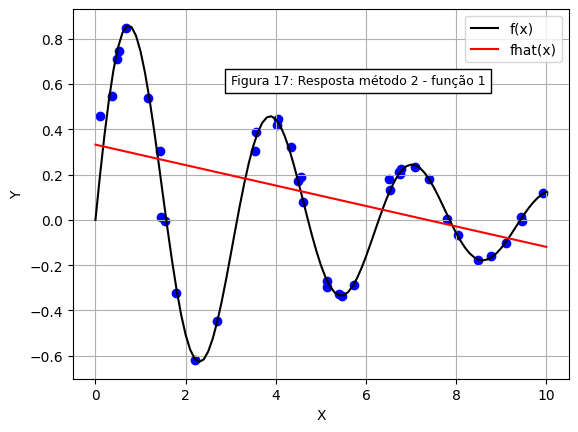

In [ ]:
plt.figure()
plt.scatter(X, Y, color = 'blue')
plt.plot(seqx, seqy, label='f(x)', color='black')
plt.plot(seqx, yhat, label='fhat(x)', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(3, 0.6, "Figura 17: Resposta método 2 - função 1", fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))
plt.legend()
plt.grid()

plt.show()

As with method 1, it is notable that method 1 was unable to resolve the issue at hand.


####Method 3 - Regression of Y on X (4th order)


In [ ]:
mseArr = []
biasArr = []
varArr = []
eArr = []

poly = PolynomialFeatures(degree=4)
model = LinearRegression()

for i in range (20):
  df, var_e = createData(ll, ul, num, sd, f)

  X = np.array(df['X']).reshape(-1,1)
  Y = np.array(df['Y'])

  Xpoly = poly.fit_transform(X)

  model.fit(Xpoly, Y)

  seqx = np.arange(ll, ul + step, step)
  seqy = [func3(x) for x in seqx]

  seqx = np.array(seqx).reshape(-1, 1)
  seqxPoly = poly.transform(seqx)
  yhat = model.predict(seqxPoly)

  varAux = findMSE(seqy, yhat)
  mseArr.append(varAux)

  varAux = findBIAS(seqy, yhat)
  biasArr.append(varAux)

  varAux = findVariance(yhat)
  varArr.append(varAux)

  eArr.append(var_e)

bias3.append(np.mean(biasArr))
mse3.append(np.mean(mseArr))
var3.append(np.mean(varArr))
e3.append(np.mean(eArr))

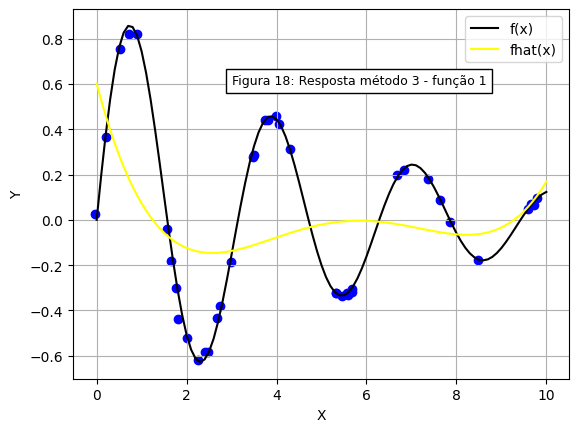

In [ ]:
plt.figure()
plt.scatter(X, Y, color='blue')
plt.plot(seqx, seqy, label='f(x)', color='black')
plt.plot(seqx, yhat, label='fhat(x)', color='yellow')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(3, 0.6, "Figura 18: Resposta método 3 - função 1", fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))
plt.legend()
plt.grid()
plt.show()


Unlike the previous methods, in this one it is already possible to observe that it tries to adjust a little more to the expected graph, but the complexity is still too high for it to be able to adjust in an acceptable way.


####Method 4 - Regression of Y on X (8th order)


In [ ]:
mseArr = []
biasArr = []
varArr = []
eArr = []

poly = PolynomialFeatures(degree=8)
model = LinearRegression()

for i in range (20):
  df, var_e = createData(ll, ul, num, sd, f)

  X = np.array(df['X']).reshape(-1,1)
  Y = np.array(df['Y'])

  Xpoly = poly.fit_transform(X)

  model.fit(Xpoly, Y)

  seqx = np.arange(ll, ul + step, step)
  seqy = [func3(x) for x in seqx]

  seqx = np.array(seqx).reshape(-1, 1)
  seqxPoly = poly.transform(seqx)
  yhat = model.predict(seqxPoly)

  varAux = findMSE(seqy, yhat)
  mseArr.append(varAux)

  varAux = findBIAS(seqy, yhat)
  biasArr.append(varAux)

  varAux = findVariance(yhat)
  varArr.append(varAux)

  eArr.append(var_e)

bias3.append(np.mean(biasArr))
mse3.append(np.mean(mseArr))
var3.append(np.mean(varArr))
e3.append(np.mean(eArr))

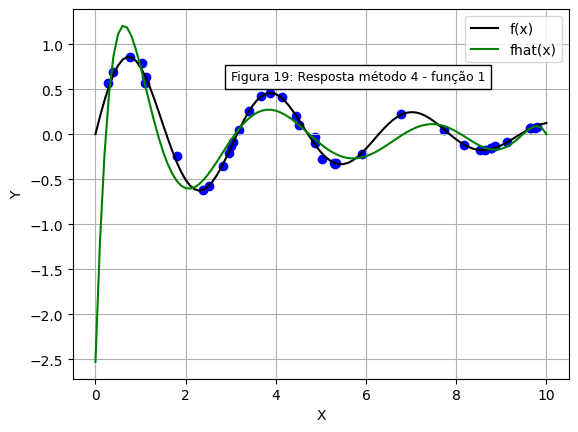

In [ ]:
plt.figure()
plt.scatter(X, Y, color='blue')
plt.plot(seqx, seqy, label='f(x)', color='black')
plt.plot(seqx, yhat, label='fhat(x)', color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(3, 0.6, "Figura 19: Resposta método 4 - função 1", fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))
plt.legend()
plt.grid()
plt.show()


For the eighth degree polynomial, it can be seen that its adjustment is much better than the others, although at the beginning it does not come so close to the function, but in the end it is able to minimally respect the behavior of the signal.


####Method 5 - Data interpolation


In [ ]:
mseArr = []
biasArr = []
varArr = []
eArr = []

for i in range (20):
  df, var_e = createData(ll, ul, num, sd, f)

  X = np.array(df['X'])
  Y = np.array(df['Y'])

  fhat = interp1d(X, Y, kind = 'linear')

  seqx = np.arange(X.min(), X.max(), step)
  seqy = [func3(x) for x in seqx]

  yhat = fhat(seqx)

  varAux = findMSE(seqy, yhat)
  mseArr.append(varAux)

  varAux = findBIAS(seqy, yhat)
  biasArr.append(varAux)

  varAux = findVariance(yhat)
  varArr.append(varAux)

  eArr.append(var_e)


bias3.append(np.mean(biasArr))
mse3.append(np.mean(mseArr))
var3.append(np.mean(varArr))
e3.append(np.mean(eArr))

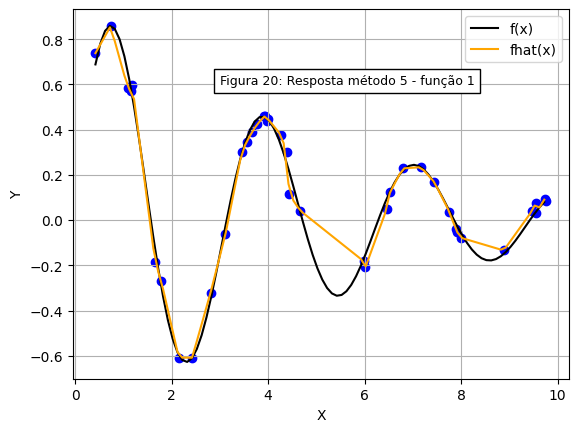

In [ ]:
plt.figure()
plt.scatter(X, Y, color='blue')
plt.plot(seqx, seqy, label='f(x)', color='black')
plt.plot(seqx, yhat, label='fhat(x)', color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(3, 0.6, "Figura 20: Resposta método 5 - função 1", fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))
plt.legend()
plt.grid()
plt.show()


Finally, for the data interpolation method, it managed to represent the function almost perfectly, its limitation is only in the amount of data sampled and, probably if there were more data, this method would come incredibly close to the original function.


####Final analysis - Function 3


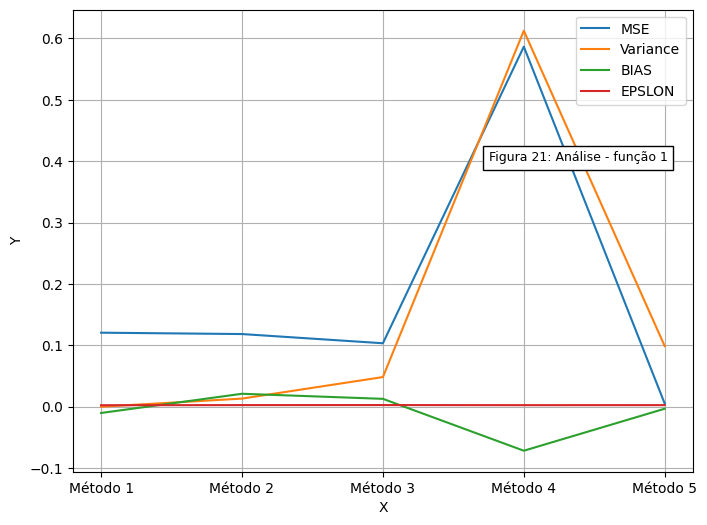

In [ ]:
xLabel = ['Método 1', 'Método 2', 'Método 3', 'Método 4', 'Método 5']

plt.figure(figsize=(8, 6))
plt.plot(xLabel, mse3, label='MSE')
plt.plot(xLabel, var3, label='Variance')
plt.plot(xLabel, bias3, label='BIAS')
plt.plot(xLabel, e3, label='EPSLON')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(2.75, 0.4, "Figura 21: Análise - função 1", fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))
plt.legend()
plt.grid()

plt.show()

It is notable that method 5 was the best in classifying the data due to its low MSE, during the execution of the methods the MSE tends to decrease subtly and arriving at method 4 it has a peak, this is probably due to the beginning of the function , but probably if you ignore this first part the MSE would decrease considerably.
